<h2>Preprocessing The Data</h2>

<h3>To start preprocessing we first need to import the libraries we will need throught out the project.</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import wandb
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

<h3> Next we will load the Mental Health in Tech data set from Kaggle. We will also explore the dataset before preprocessing. </h3>

In [2]:
df = pd.read_csv(r"C:\Users\adamr\Documents\DSS740_ML\DSS740_Final\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [5]:
import sys
sys.path.append(r"C:\Users\adamr\Documents\DSS740_ML\sju_spring2025_ml\Src\data_preprocessing")
from data_preprocessing import PreProcessData
preprocess = PreProcessData(scaleType='normalize')

In [6]:
preprocess.data = df.copy()

In [7]:
columns_to_drop = ['Timestamp','comments','state']
df = preprocess.data.drop(columns=columns_to_drop)
print(df.head())

   Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat 

In [8]:

print(df['Gender'].unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [9]:
gender = df['Gender'].str.lower()
gender = df['Gender'].unique()

In [10]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [11]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)


Categorical columns: ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


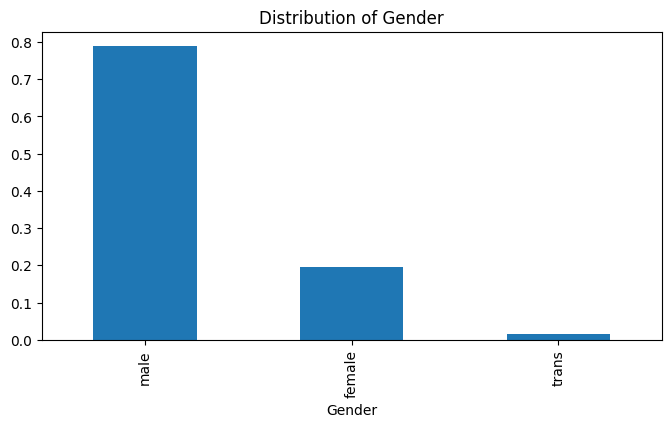

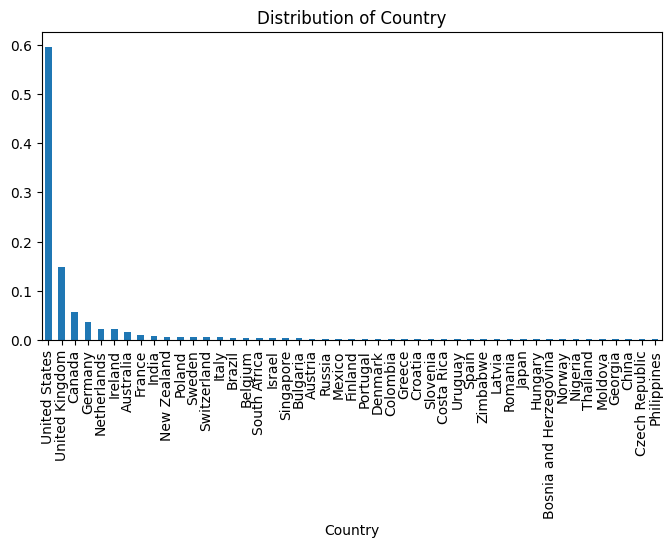

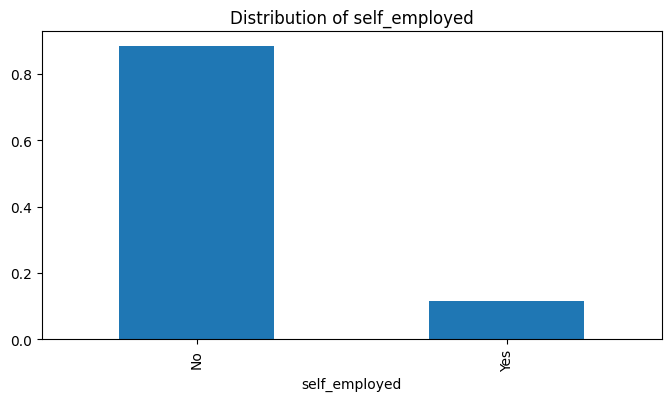

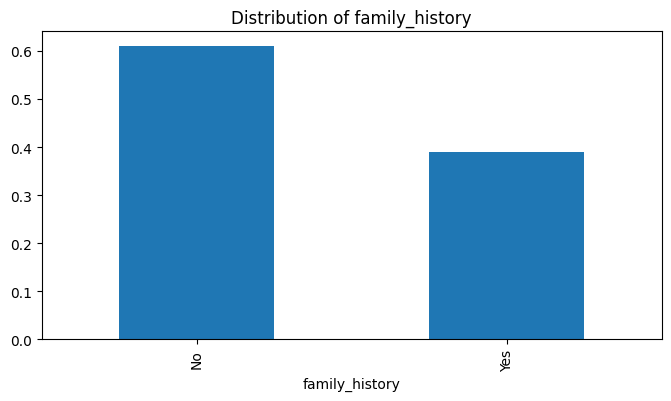

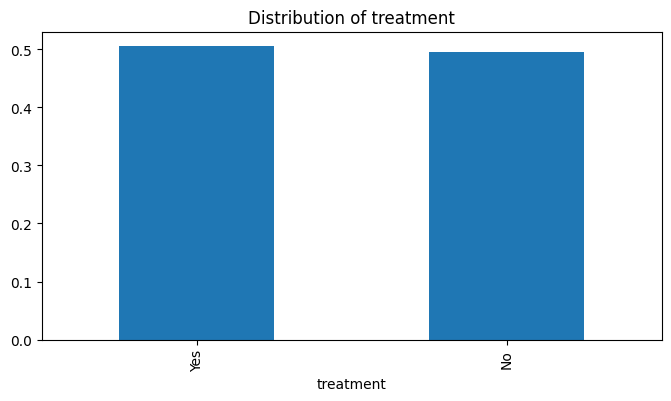

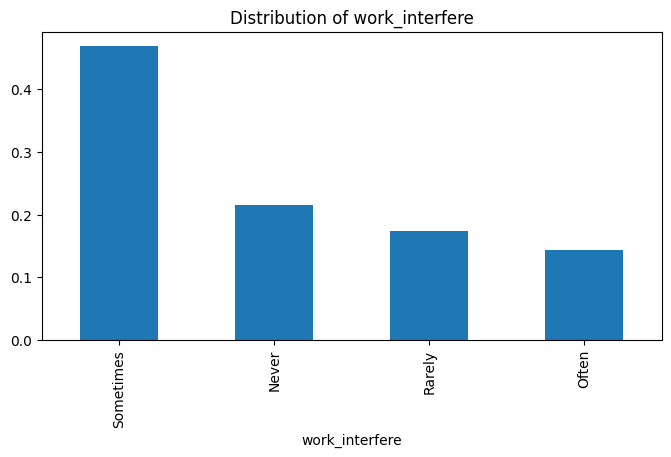

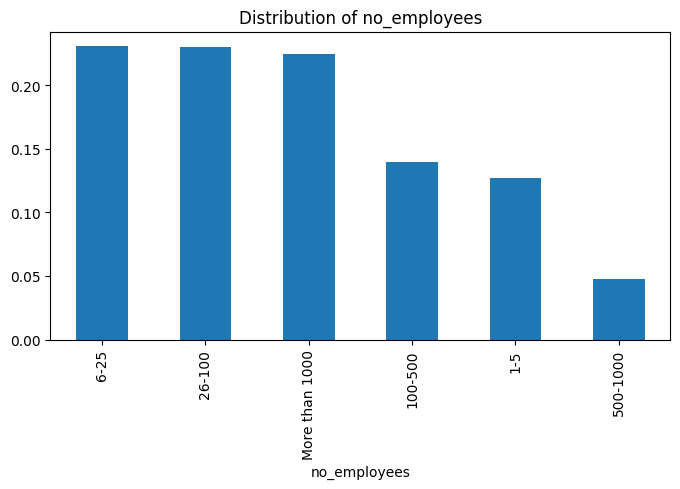

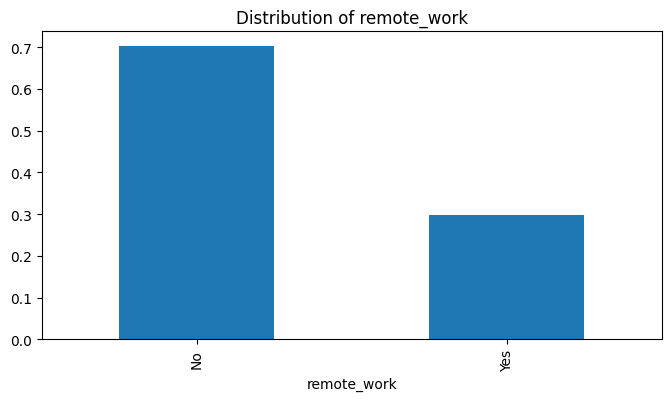

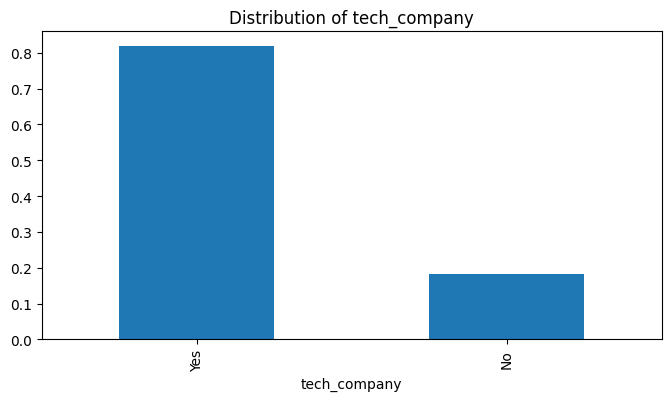

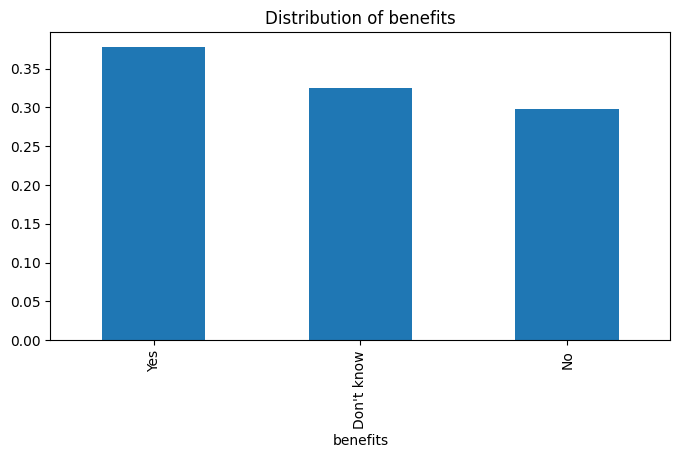

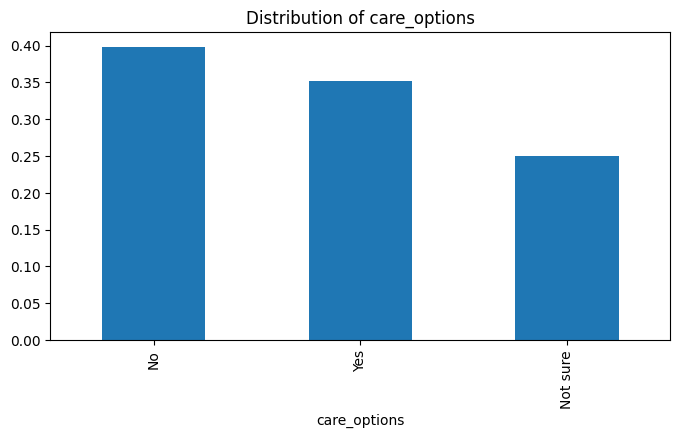

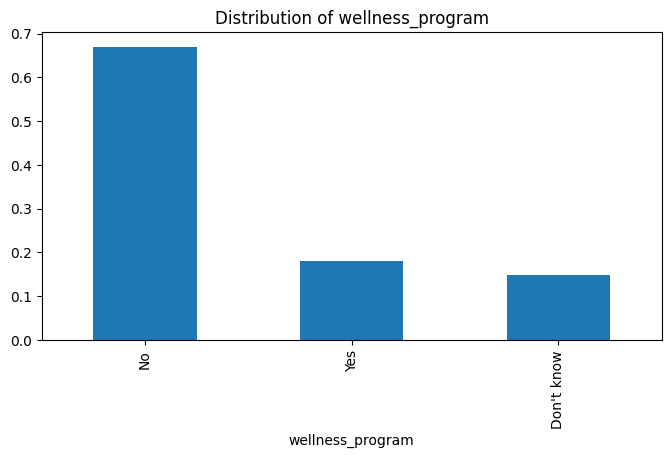

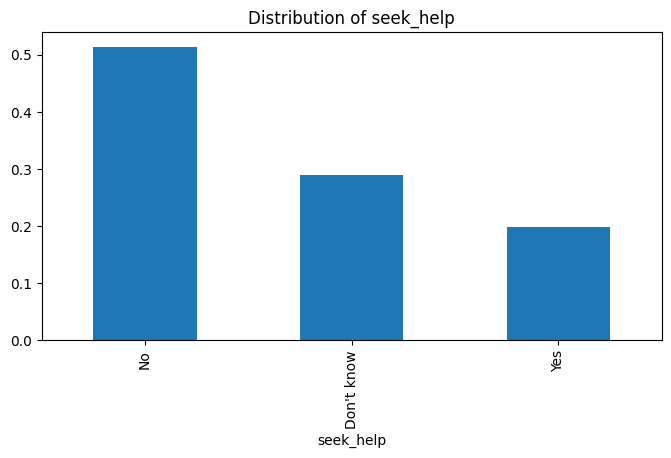

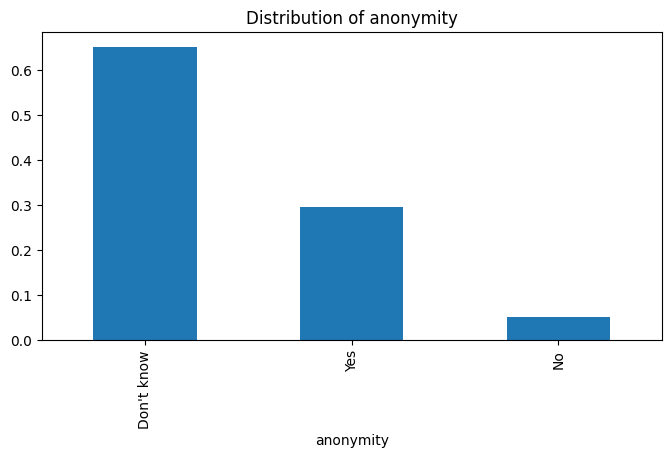

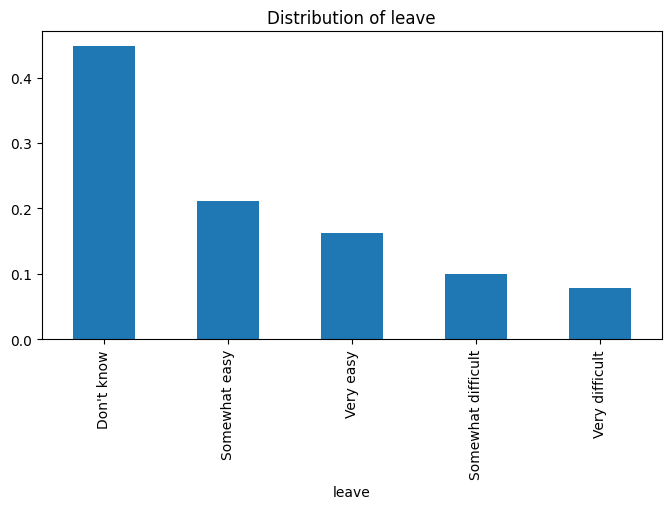

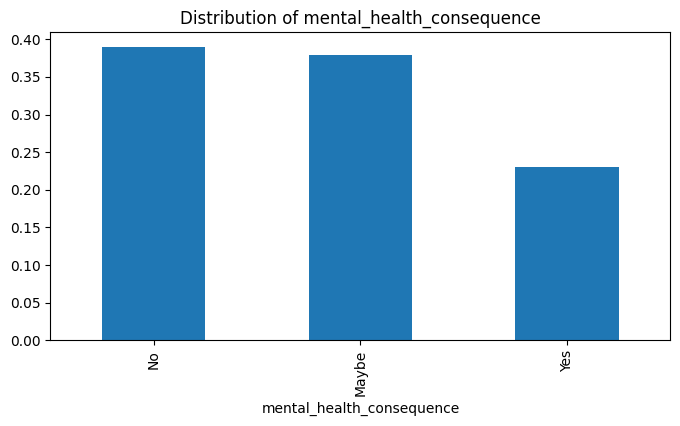

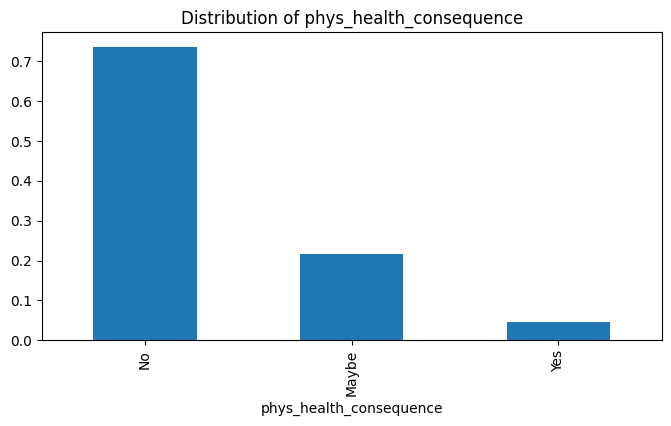

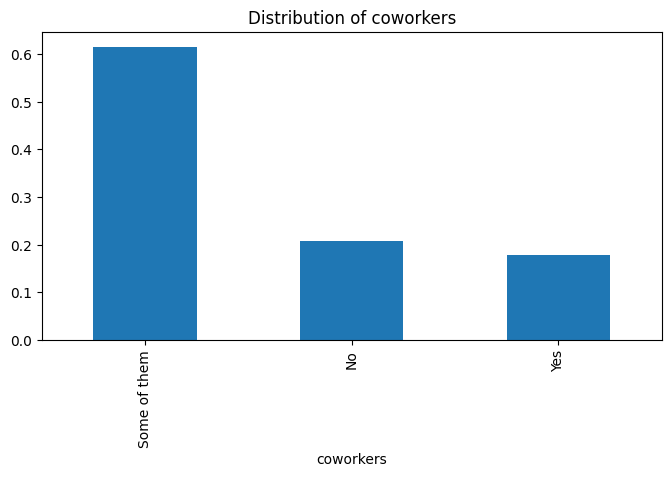

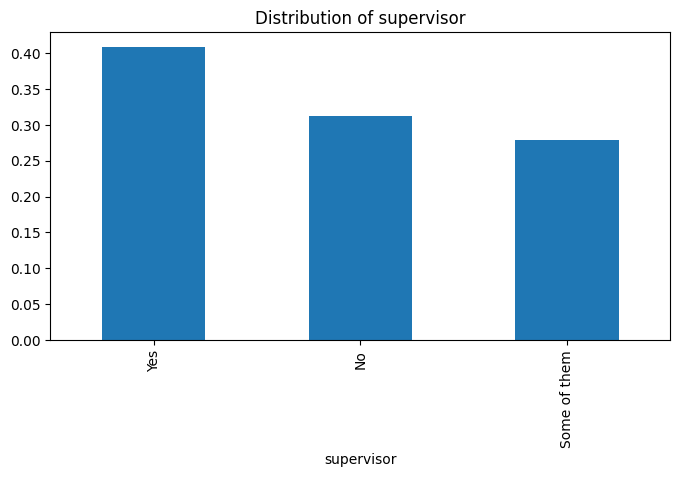

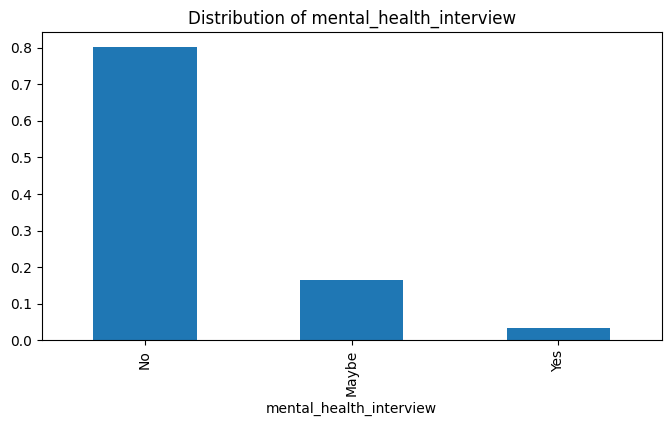

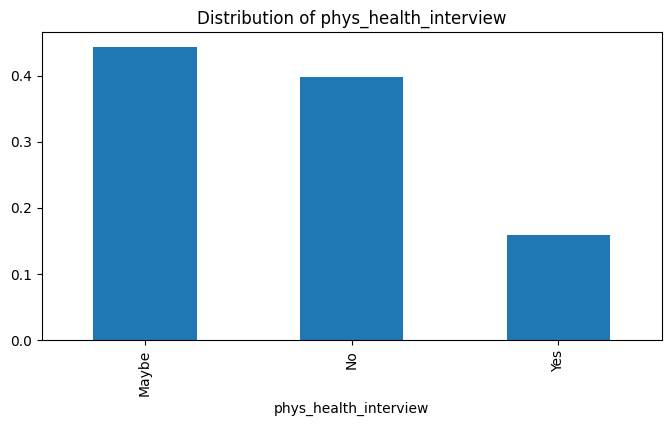

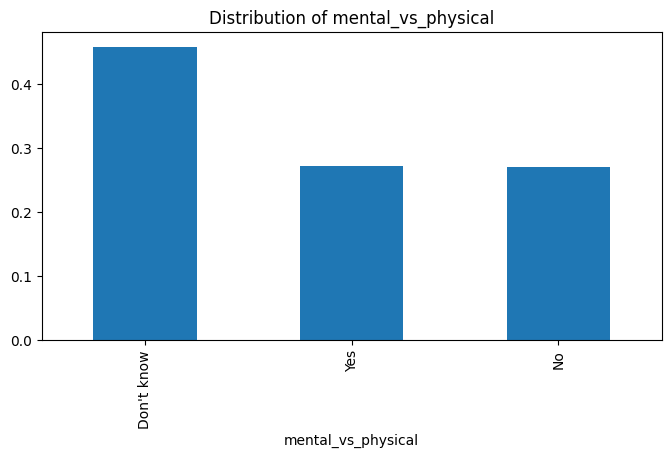

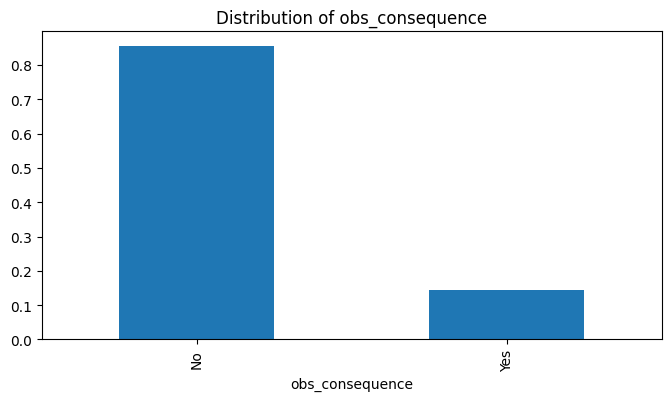

In [13]:
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

In [14]:

defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0


intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [15]:
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [16]:
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [17]:
binary_columns = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [18]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,0,0,1,Often,6-25,0,1,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44,male,United States,0,0,0,Rarely,More than 1000,0,0,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32,male,Canada,0,0,0,Rarely,6-25,0,1,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31,male,United Kingdom,0,1,1,Often,26-100,0,1,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31,male,United States,0,0,0,Never,100-500,1,1,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0


In [19]:
df = df.drop(['Country','no_employees'], axis=1)
print(df.head())

   Age  Gender  self_employed  family_history  treatment work_interfere  \
0   37  female              0               0          1          Often   
1   44    male              0               0          0         Rarely   
2   32    male              0               0          0         Rarely   
3   31    male              0               1          1          Often   
4   31    male              0               0          0          Never   

   remote_work  tech_company    benefits care_options  ...   anonymity  \
0            0             1         Yes     Not sure  ...         Yes   
1            0             0  Don't know           No  ...  Don't know   
2            0             1          No           No  ...  Don't know   
3            0             1          No          Yes  ...          No   
4            1             1         Yes           No  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy        

In [21]:
df = pd.get_dummies(
    df,
    columns=[
        'Gender', 'work_interfere', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity', 'leave',
        'mental_health_consequence', 'phys_health_consequence', 'coworkers',
        'supervisor', 'mental_health_interview', 'phys_health_interview',
        'mental_vs_physical'
    ],
    drop_first=True,
    dtype=int
)
print(df.head())

   Age  self_employed  family_history  treatment  remote_work  tech_company  \
0   37              0               0          1            0             1   
1   44              0               0          0            0             0   
2   32              0               0          0            0             1   
3   31              0               1          1            0             1   
4   31              0               0          0            1             1   

   obs_consequence  Gender_male  Gender_trans  work_interfere_Never  ...  \
0                0            0             0                     0  ...   
1                0            1             0                     0  ...   
2                0            1             0                     0  ...   
3                1            1             0                     0  ...   
4                0            1             0                     1  ...   

   coworkers_Some of them  coworkers_Yes  supervisor_Some of them  \

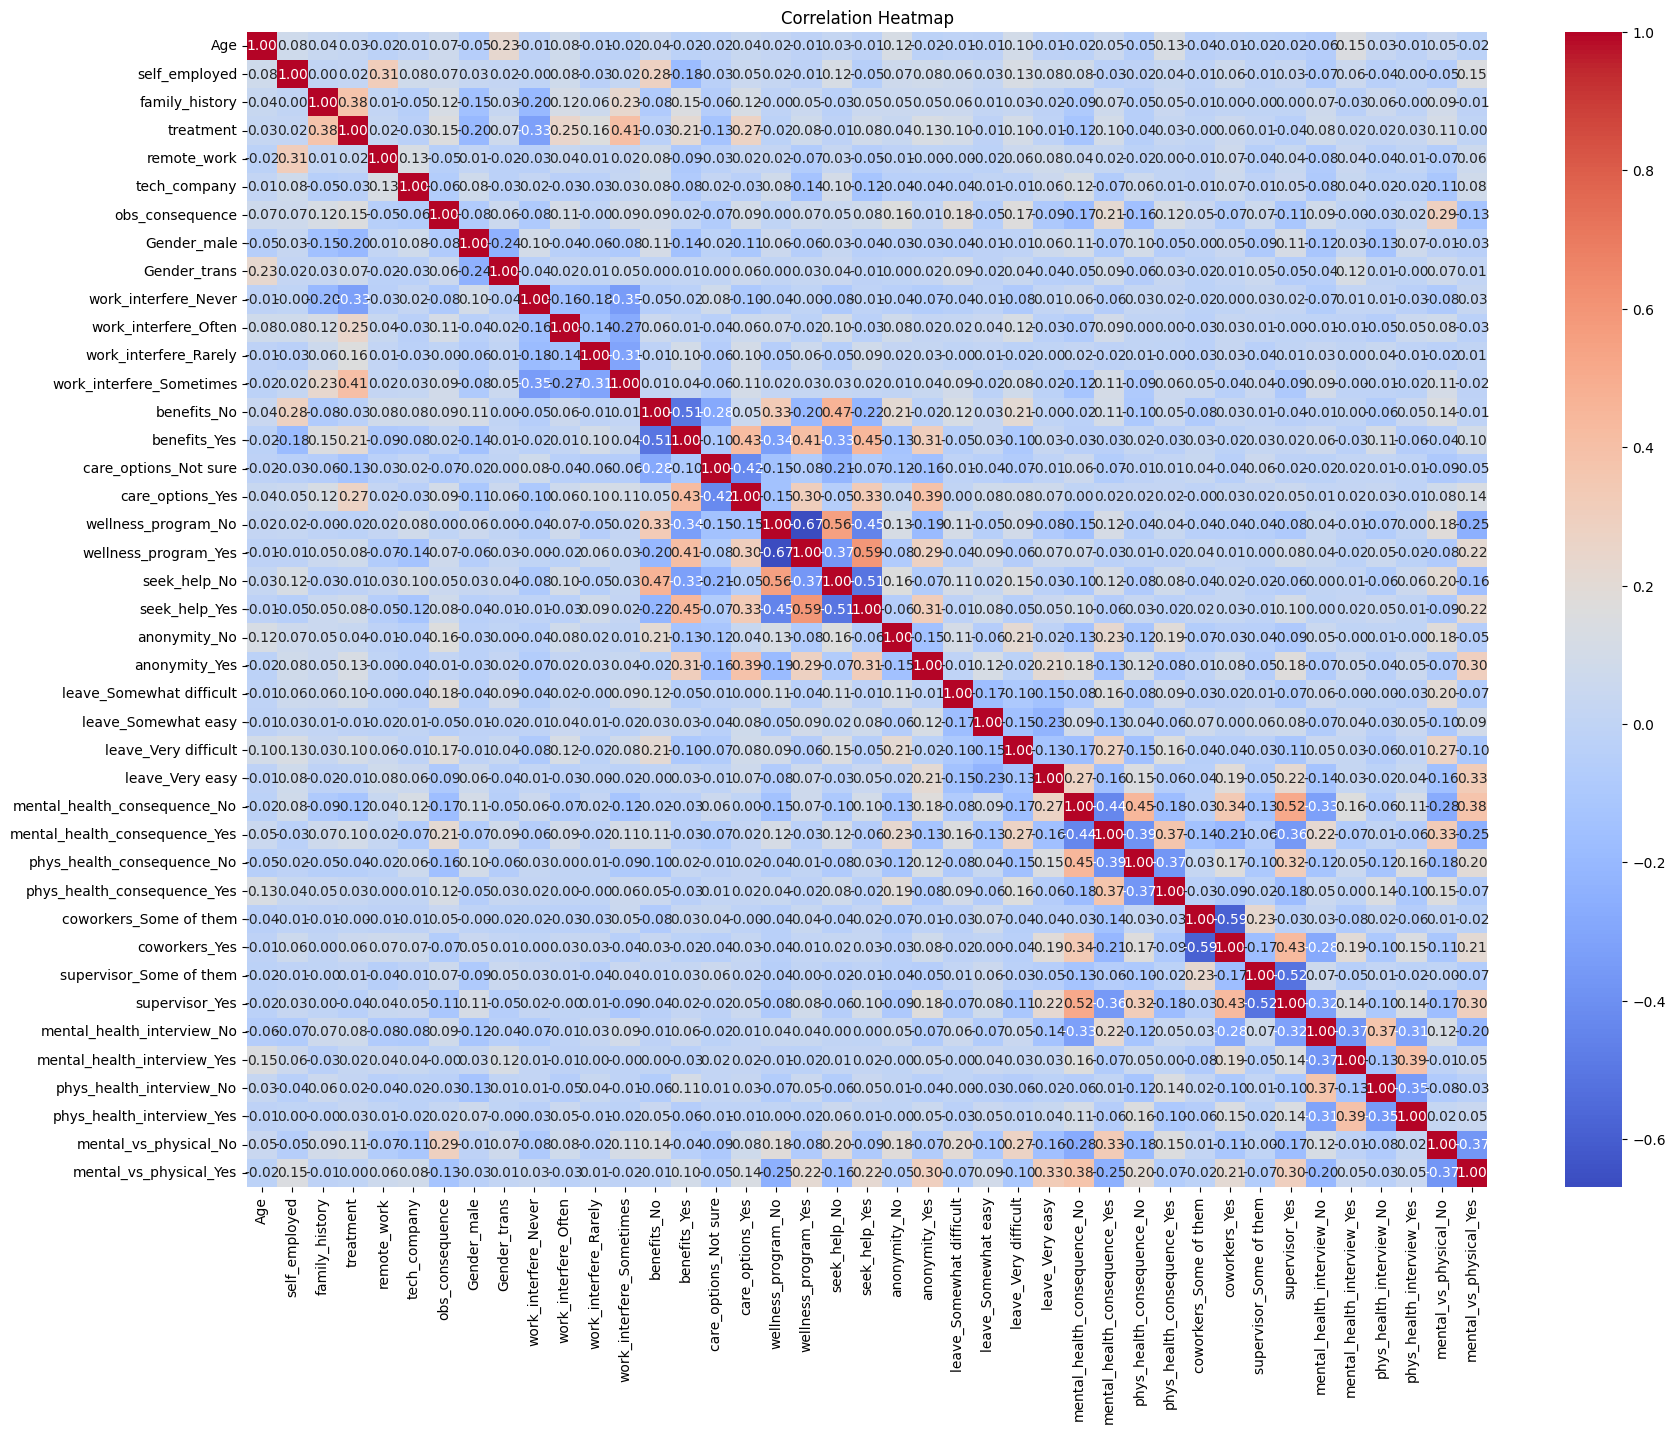

In [22]:
plt.figure(figsize=(20, 15)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

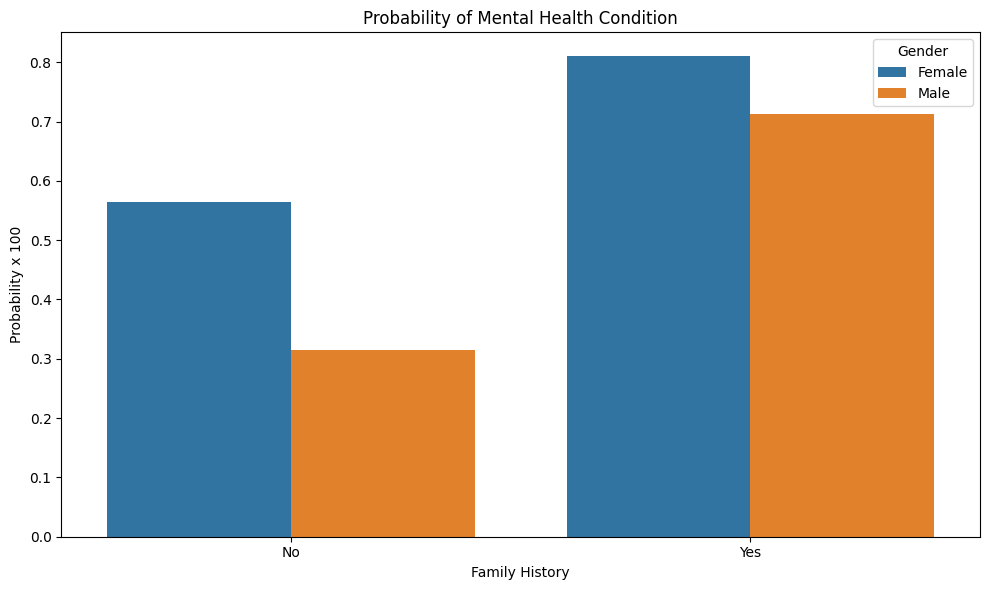

In [23]:
df_plot = df.copy()
df_plot['family_history'] = df['family_history'].map({1: 'Yes', 0: 'No'})
df_plot['Gender'] = df['Gender_male'].map({1: 'Male', 0: 'Female'})  


plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='family_history', y='treatment', hue='Gender', ci=None)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

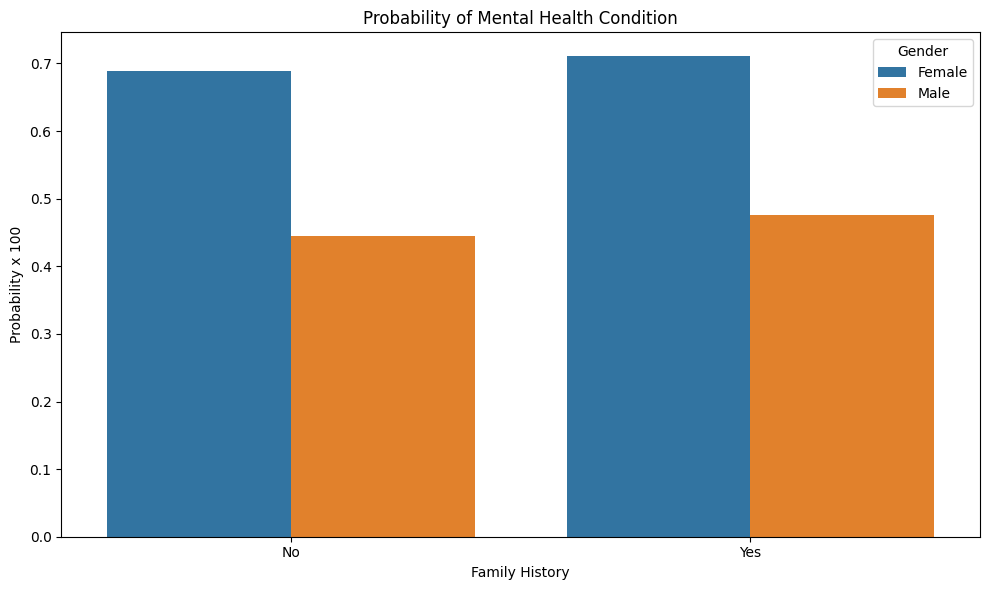

In [24]:
df_plot = df.copy()
df_plot['remote_work'] = df['remote_work'].map({1: 'Yes', 0: 'No'})
df_plot['Gender'] = df['Gender_male'].map({1: 'Male', 0: 'Female'})  


plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='remote_work', y='treatment', hue='Gender', ci=None)

plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [28]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61          11          72]


In [29]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

In [30]:
df['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

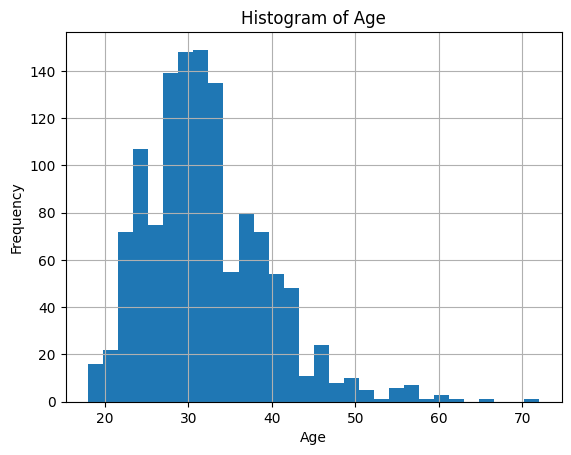

In [31]:
df['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
minmax_scaler = MinMaxScaler()
df[['Age']] = minmax_scaler.fit_transform(df[['Age']])
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_male,Gender_trans,work_interfere_Never,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,0.351852,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0.481481,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.259259,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
3,0.240741,0,1,1,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.240741,0,0,0,1,1,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [33]:
X = df.drop(['treatment'], axis=1)
y = df['treatment']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [35]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (875, 40)
X_test: (376, 40)
